In [1]:
import moleculegraph
import numpy as np
import toml

import unittest

[0. 0. 0. 1. 1. 2. 2. 1. 1. 1. 1. 3. 1. 0. 0.]
f_p , self.f[f_p] [ 3  5 11] [ 6.  1. -6.]
[0. 0. 0. 1. 1. 2. 2. 1. 1. 1. 1. 3. 1. 0. 0.]
[0. 0. 0. 1. 1. 2. 2. 1. 1. 1. 1. 3. 1. 0. 0.]
[0. 0. 0. 1. 1. 2. 2. 1. 1. 1. 1. 3. 1. 0. 0.]
fin branches [0. 0. 0. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 0. 0.]
[[0. 1. 2. 3. 4. 4. 5. 4. 3. 4. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 3. 2. 3. 2. 3.]
 [2. 1. 0. 1. 2. 2. 3. 2. 1. 2. 1. 2.]
 [3. 2. 1. 0. 1. 1. 2. 3. 2. 3. 2. 3.]
 [4. 3. 2. 1. 0. 2. 3. 4. 3. 4. 3. 4.]
 [4. 3. 2. 1. 2. 0. 1. 2. 3. 4. 3. 4.]
 [5. 4. 3. 2. 3. 1. 0. 1. 2. 3. 4. 5.]
 [4. 3. 2. 3. 4. 2. 1. 0. 1. 2. 3. 4.]
 [3. 2. 1. 2. 3. 3. 2. 1. 0. 1. 2. 3.]
 [4. 3. 2. 3. 4. 4. 3. 2. 1. 0. 3. 4.]
 [3. 2. 1. 2. 3. 3. 4. 3. 2. 3. 0. 1.]
 [4. 3. 2. 3. 4. 4. 5. 4. 3. 4. 1. 0.]]


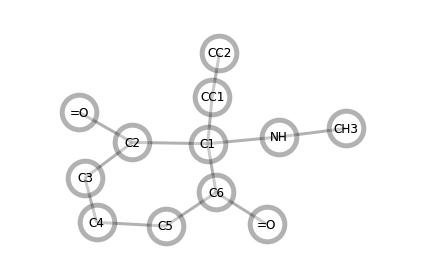

{'CH3': 0.5, 'NH': 0.25, 'C1': 0.165, 'C2': 0.125, '=O': 0.1, 'C3': 0.085, 'C4': 0.07, 'C5': 0.06, 'C6': 0.055, 'CC1': 0.05, 'CC2': 0.045}
[[ 2.    1.    0.5   0.33  0.25  0.25  0.2   0.25  0.33  0.25  0.33  0.25]
 [ 1.    4.    1.    0.5   0.33  0.33  0.25  0.33  0.5   0.33  0.5   0.33]
 [ 0.5   1.    6.06  1.    0.5   0.5   0.33  0.5   1.    0.5   1.    0.5 ]
 [ 0.33  0.5   1.    8.    1.    1.    0.5   0.33  0.5   0.33  0.5   0.33]
 [ 0.25  0.33  0.5   1.   10.    0.5   0.33  0.25  0.33  0.25  0.33  0.25]
 [ 0.25  0.33  0.5   1.    0.5  11.76  1.    0.5   0.33  0.25  0.33  0.25]
 [ 0.2   0.25  0.33  0.5   0.33  1.   14.29  1.    0.5   0.33  0.25  0.2 ]
 [ 0.25  0.33  0.5   0.33  0.25  0.5   1.   16.67  1.    0.5   0.33  0.25]
 [ 0.33  0.5   1.    0.5   0.33  0.33  0.5   1.   18.18  1.    0.5   0.33]
 [ 0.25  0.33  0.5   0.33  0.25  0.25  0.33  0.5   1.   10.    0.33  0.25]
 [ 0.33  0.5   1.    0.5   0.33  0.33  0.25  0.33  0.5   0.33 20.    1.  ]
 [ 0.25  0.33  0.5   0.33  0.25  0.2

In [2]:
a_mut_keta = "[CH3][NH][C1][b6][C2][b1][=O][C3][C4][C5][C6][r6][=O][CC1][CC2]"#"[b1][Cl][CC3][CC4][CC5][CC6][r6]" 

a_molecule = moleculegraph.molecule(a_mut_keta)
#print(np.array([molecule.atom_numbers.astype(float)]) )
print( a_molecule.distance_matrix )
a_dist  = a_molecule.distance_matrix
a_blist = a_molecule.bond_list


"""
assigning weights like this is very constructed... maybe use a kernel fun :P
"""
alpha = a_molecule.unique_atom_names
alpha_wei_dic = {}
phi = 2
for i,a in enumerate(alpha):
    alpha_wei_dic[a] = round( 1/ (i+1) , 2 ) / phi

a_molecule.visualize()
print(alpha_wei_dic)

a_wei = np.diag( a_molecule.map_molecule_via_atom_names(alpha_wei_dic) )

A = ( a_wei + a_dist )**-1
A = A.round(2)

print(A)

[0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 3. 3. 3. 0. 0.]
f_p , self.f[f_p] [ 6  9 10] [ 1. -6.  2.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 3. 3. 3. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 3. 3. 3. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 3. 3. 3. 0. 0.]
fin branches [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 3. 3. 3. 0. 0.]
Error in get_atom_no: not an atom
[[0. 1. 2. 3. 4. 3. 4. 2. 1. 2. 3. 4.]
 [1. 0. 1. 2. 3. 2. 3. 1. 2. 3. 2. 3.]
 [2. 1. 0. 1. 2. 3. 4. 2. 3. 4. 3. 4.]
 [3. 2. 1. 0. 1. 2. 3. 3. 4. 5. 4. 5.]
 [4. 3. 2. 1. 0. 1. 2. 2. 5. 6. 3. 4.]
 [3. 2. 3. 2. 1. 0. 1. 1. 4. 5. 2. 3.]
 [4. 3. 4. 3. 2. 1. 0. 2. 5. 6. 3. 4.]
 [2. 1. 2. 3. 2. 1. 2. 0. 3. 4. 1. 2.]
 [1. 2. 3. 4. 5. 4. 5. 3. 0. 1. 4. 5.]
 [2. 3. 4. 5. 6. 5. 6. 4. 1. 0. 5. 6.]
 [3. 2. 3. 4. 3. 2. 3. 1. 4. 5. 0. 1.]
 [4. 3. 4. 5. 4. 3. 4. 2. 5. 6. 1. 0.]]


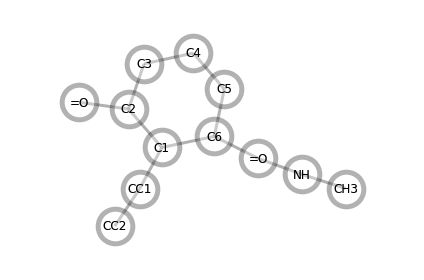

[[10.    1.    0.5   0.33  0.25  0.33  0.25  0.5   1.    0.5   0.33  0.25]
 [ 1.   18.18  1.    0.5   0.33  0.5   0.33  1.    0.5   0.33  0.5   0.33]
 [ 0.5   1.   16.67  1.    0.5   0.33  0.25  0.5   0.33  0.25  0.33  0.25]
 [ 0.33  0.5   1.   14.29  1.    0.5   0.33  0.33  0.25  0.2   0.25  0.2 ]
 [ 0.25  0.33  0.5   1.   11.76  1.    0.5   0.5   0.2   0.17  0.33  0.25]
 [ 0.33  0.5   0.33  0.5   1.    8.    1.    1.    0.25  0.2   0.5   0.33]
 [ 0.25  0.33  0.25  0.33  0.5   1.   10.    0.5   0.2   0.17  0.33  0.25]
 [ 0.5   1.    0.5   0.33  0.5   1.    0.5   6.06  0.33  0.25  1.    0.5 ]
 [ 1.    0.5   0.33  0.25  0.2   0.25  0.2   0.33  4.    1.    0.25  0.2 ]
 [ 0.5   0.33  0.25  0.2   0.17  0.2   0.17  0.25  1.    2.    0.2   0.17]
 [ 0.33  0.5   0.33  0.25  0.33  0.5   0.33  1.    0.25  0.2  20.    1.  ]
 [ 0.25  0.33  0.25  0.2   0.25  0.33  0.25  0.5   0.2   0.17  1.   22.22]]


In [3]:
b_mut_keta = "[=O][C6][C5][C4][C3][C2][b1][=O][C1][r6][b2][NH][CH3][CC1][CC2]" #"[b1][Cl][CC3][CC4][CC5][CC6][r6]" 

b_molecule = moleculegraph.molecule(b_mut_keta)
#print(np.array([molecule.atom_numbers.astype(float)]) )
print( b_molecule.distance_matrix )
b_dist  = b_molecule.distance_matrix
b_blist = b_molecule.bond_list

b_molecule.visualize()

b_wei = np.diag( b_molecule.map_molecule_via_atom_names(alpha_wei_dic) )

B = ( b_wei + b_dist )**-1
B = B.round(2)

print(B)

In [4]:
Aeig, _ = np.linalg.eig(A)
Beig, _ = np.linalg.eig(B)
Aeig = np.sort( np.squeeze(Aeig) )
Beig = np.sort( np.squeeze(Beig) )
print( "0: " ,np.sum( Aeig - Beig ) )
#Aeig, Beig
print( Aeig )


0:  -6.616929226765933e-14
[ 1.57816267  3.84061967  5.83410485  7.68879381  9.73690838 10.19868058
 11.81738137 14.25343325 16.42297193 18.78227144 20.06813715 22.95853491]


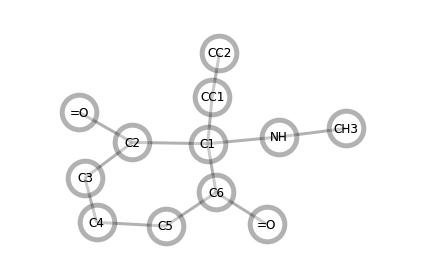

'[CH3][NH][C1][b6][C2][b1][=O][C3][C4][C5][C6][r6][=O][CC1][CC2]'

In [5]:
a_molecule.visualize()
a_mut_keta

In [6]:
dummy, _ = np.linalg.eig(  np.diag( 1/np.array( a_molecule.map_molecule_via_atom_names(alpha_wei_dic) ) ) )
ddummy = np.sort( np.squeeze( dummy ) )
print( ddummy )

[ 2.          4.          6.06060606  8.         10.         10.
 11.76470588 14.28571429 16.66666667 18.18181818 20.         22.22222222]


In [7]:
print( 1/np.diagonal( a_wei ) )

[ 2.          4.          6.06060606  8.         10.         11.76470588
 14.28571429 16.66666667 18.18181818 10.         20.         22.22222222]
